In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

results27-02-2024 11:33:50.csv


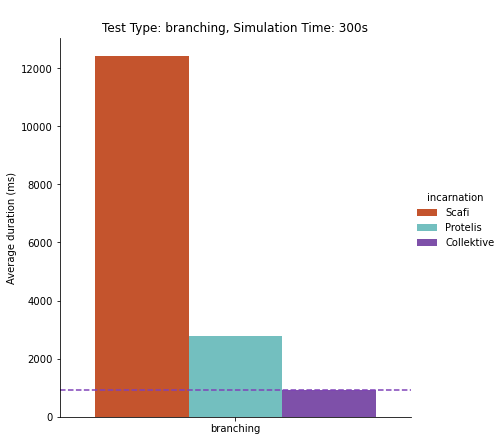

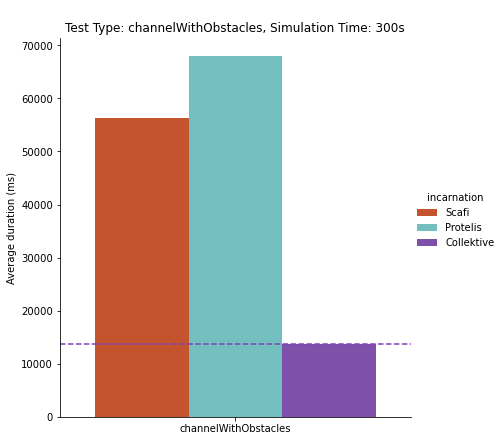

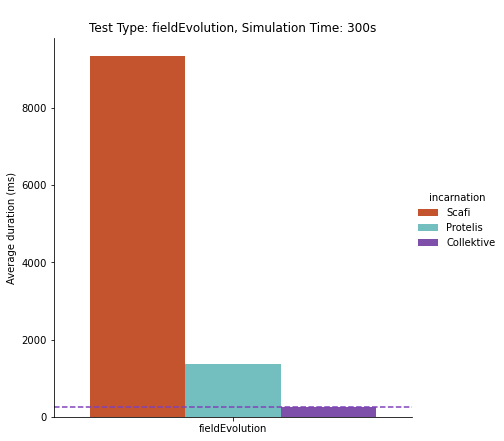

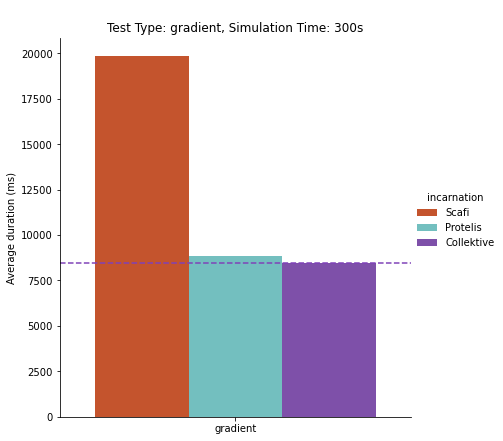

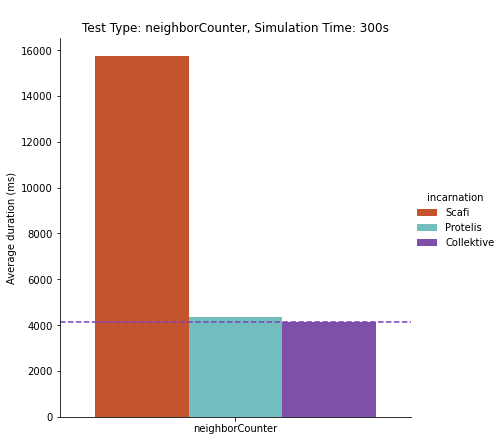

In [2]:
script_directory = os.path.dirname(os.path.abspath("plotting"))

csv_files = [file for file in os.listdir(script_directory) if file.endswith('.csv')]
sorted_files = sorted(csv_files, key=lambda x: os.path.getctime(os.path.join(script_directory, x)), reverse=True)
last_file_name = sorted_files[0]

df = pd.read_csv(last_file_name, header=None, names=["incarnation", "test_type", "average", "simulation_time"])
df["incarnation"] = df["incarnation"].map(lambda x: x.capitalize())
grouped_df = df.groupby(["test_type", df["simulation_time"].astype(int)])

custom_palette = {
    "Collektive": "#7F41B8", 
    "Scafi": "#DD4814",     
    "Protelis": "#66CCCC"  
}

output_folder = "plots"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for group_name, group_data in grouped_df:
    g = sns.catplot(
        data=group_data, kind="bar",
        x="test_type", y="average", hue="incarnation",
        palette=custom_palette, height=6
    )
    
    lowest_test_type = group_data.loc[group_data["average"].idxmin()]["incarnation"]
    lowest_avg_value = group_data["average"].min()
    
    g.ax.axhline(y=lowest_avg_value, color=custom_palette[lowest_test_type], linestyle="--", 
                label=f"{lowest_test_type} lowest")
    
    g.set(title=f"\nTest Type: {group_name[0]}, Simulation Time: {group_name[1]}s",
          xlabel="", ylabel="Average duration (ms)")
    
    # Save the plot as a PDF file
    filename = f"{group_name[0]}_{group_name[1]}.png"
    filepath = os.path.join(output_folder, filename)
    plt.savefig(filepath, format="png")
    
plt.show()

In [5]:
test_types = ['fieldEvolution', 'neighborCounter', 'branching', 'gradient', 'channelWithObstacles']

for tt in test_types:
    df_tt = df[df['test_type'] == tt]
    df_s = df_tt[df_tt['incarnation'] == 'Scafi']['average']
    df_c = df_tt[df_tt['incarnation'] == 'Collektive']['average']
    df_p = df_tt[df_tt['incarnation'] == 'Protelis']['average']
    delta_cs = df_s.iloc[0] / df_c.iloc[0]
    delta_cp = df_p.iloc[0] / df_c.iloc[0]
    print(f'In test type {tt}')
    print(f'Collektive is {delta_cs} times faster than Scafi and {delta_cp} times faster than Protelis')

In test type fieldEvolution
Collektive is 37.83400809716599 times faster than Scafi and 5.522267206477733 times faster than Protelis
In test type neighborCounter
Collektive is 3.8055085769509542 times faster than Scafi and 1.0488040589514376 times faster than Protelis
In test type branching
Collektive is 13.302997858672377 times faster than Scafi and 2.9946466809421843 times faster than Protelis
In test type gradient
Collektive is 2.3501360785705834 times faster than Scafi and 1.0467400307655899 times faster than Protelis
In test type channelWithObstacles
Collektive is 4.080732749257838 times faster than Scafi and 4.925494171312722 times faster than Protelis


In [6]:
script_directory = os.path.dirname(os.path.abspath("plotting"))

csv_files = [file for file in os.listdir(script_directory) if file.endswith('.csv')]
sorted_files = sorted(csv_files, key=lambda x: os.path.getctime(os.path.join(script_directory, x)), reverse=True)
last_file_name = sorted_files[0:3]

['results27-02-2024 11:33:50.csv', 'results27-02-2024 10:44:11.csv', 'results27-02-2024 09:57:33.csv']


In [7]:
concat = []
n = [3, 8, 13]
for file in last_file_name:
    d = pd.read_csv(file, header=None, names=["incarnation", "test_type", "average", "simulation_time"])
    d["incarnation"] = d["incarnation"].map(lambda x: x.capitalize())
    d['distance'] = n[last_file_name.index(file)]   
    concat.append(d)
    
df = pd.concat(concat, ignore_index=True)

3
8
13


In [9]:
custom_palette = {
    "Collektive": "#7F41B8",  
    "Scafi": "#DD4814",       
    "Protelis": "#66CCCC"     
}

output_folder = "plots"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

test_types = ['fieldEvolution', 'neighborCounter', 'branching', 'gradient', 'channelWithObstacles']

In [10]:
def mk_chart_exp(experiment, df):
    df_scafi = df[df['incarnation'] == 'Scafi']
    df_protelis = df[df['incarnation'] == 'Protelis']
    df_collektive = df[df['incarnation'] == 'Collektive']
   
    results = pd.DataFrame(columns=['incarnation', 'value', 'distance'])

    for distance in df['distance'].unique():
        delta_scafi = df_scafi[df_scafi['distance'] == distance]['average'].iloc[0] / df_collektive[df_collektive['distance'] == distance]['average'].iloc[0]    
        delta_protelis = df_protelis[df_protelis['distance'] == distance]['average'].iloc[0] / df_collektive[df_collektive['distance'] == distance]['average'].iloc[0]
        row_cs = {'incarnation': 'Scafi','value': delta_scafi, 'distance': distance}
        row_cp = {'incarnation': 'Protelis','value': delta_protelis, 'distance': distance}
        results = results.append(row_cs, ignore_index=True)
        results = results.append(row_cp, ignore_index=True)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=results, x='distance', y='value', hue='incarnation', palette=custom_palette)
    plt.title(f'Scafi vs Collektive and Protelis vs Collektive in {experiment}', fontsize=20)
    plt.xlabel(f'Simulation\'s linking listance', fontsize=20)
    plt.ylabel('Collektive speedup', fontsize=20)
    plt.xticks(rotation=45)
    plt.savefig(f'{experiment}-speedup.pdf',dpi=500)
    #plt.show()
    plt.close()

In [11]:
test_types = df['test_type'].unique()

for test_type in test_types:
    df_tt = df[df['test_type'] == test_type]
    mk_chart_exp(test_type, df_tt)

/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cp, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

  incarnation      value distance
0       Scafi  37.834008        3
1    Protelis   5.522267        3
2       Scafi  32.147436        8
3    Protelis   5.692308        8
4       Scafi  11.040404       13
5    Protelis   3.212121       13


/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cp, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

  incarnation     value distance
0       Scafi  3.805509        3
1    Protelis  1.048804        3
2       Scafi  3.456252        8
3    Protelis  1.097883        8
4       Scafi  2.534328       13
5    Protelis  1.002985       13
  incarnation      value distance
0       Scafi  13.302998        3
1    Protelis   2.994647        3
2       Scafi  15.599593        8
3    Protelis   3.441057        8
4       Scafi   7.592727       13
5    Protelis   2.509091       13


/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cp, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

  incarnation     value distance
0       Scafi  2.350136        3
1    Protelis   1.04674        3
2       Scafi  2.779215        8
3    Protelis  1.592912        8
4       Scafi  2.357642       13
5    Protelis  1.334665       13
  incarnation     value distance
0       Scafi  4.080733        3
1    Protelis  4.925494        3
2       Scafi  6.081259        8
3    Protelis   5.50586        8
4       Scafi  3.214555       13
5    Protelis   4.62372       13


/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cp, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row_cs, ignore_index=True)
/var/folders/9s/vv9k_9qx7ks7r5flqrnsy2z80000gn/T/ipykernel_44964/3423581375.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U